# Climatologies of vertical profiles of salinity, temperature and density averaged over the DCA

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmocean.cm as cmo
import seaborn as sns
sns.set_style('dark')
import datetime
from datetime import timedelta
from info import datadir, figdir, getMonths

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = sio.loadmat(datadir+'timedepth_DCA.mat')

time = data['time'][0]
t0 = datetime.datetime(1950,1,1,0,0) # origin of time = 1 January 1950, 00:00:00 UTC
dates = np.array([t0 + datetime.timedelta(hours=i) for i in time])
depth = data['depth'][0]

SA = data['SA']
CT = data['CT']
sigma0 = data['sigma0']

In [3]:
months = getMonths(dates)
    
def makeClimatology(data):
    """
    Computes the climatology of a timeseries of depth profiles.
    
    Parameters:
        data (numpy array): contains the timeseries of depth profiles,
                            must have dimensions (time,depth).
    """
    nvert = np.shape(data)[1] # number of vertical levels
    data_clim = np.zeros((12,nvert))
    for i in range(12):
        data_clim[i,:] = np.nanmean([data[j,:] for j in months[i]],axis=0)
    return data_clim

SA_clim = makeClimatology(SA)
CT_clim = makeClimatology(CT)
sigma0_clim = makeClimatology(sigma0)

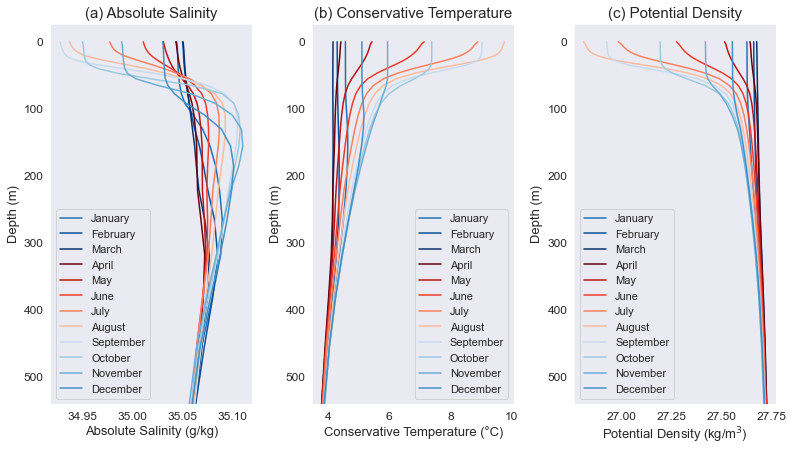

In [4]:
month_labels = {0: 'January', 1: 'February', 2: 'March', 3: 'April', 4: 'May', 5: 'June', 6: 'July', 7: 'August',\
          8: 'September', 9: 'October', 10: 'November', 11: 'December'}
cmap1 = matplotlib.cm.get_cmap('Blues') # for winter months
colors1 = np.array([cmap1(i) for i in np.linspace(0.25,1,7)])
cmap2 = matplotlib.cm.get_cmap('Reds_r') # for summer months
colors2 = np.array([cmap2(i) for i in np.linspace(0,0.75,5)])
colors = np.vstack((colors1,colors2))

def plotClimatology(ax,data,vert,maxvert,title,datalabel,vertlabel='Depth (m)'):
    for i in range(12):
        ax.plot(data[i,0:maxvert],vert[0:maxvert],label=month_labels[i],color=colors[(i+4)%12])
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.tick_params(axis='both', labelsize=12)
    ax.set_xlabel(datalabel, fontsize=13)
    ax.set_ylabel(vertlabel, fontsize=13)
    ax.set_title(title, fontsize=15)
    ax.legend(fontsize=11)

max_depth_ind = np.where(depth>500)[0][0]
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(13,7))
plotClimatology(ax1,SA_clim,depth,max_depth_ind+1,'(a) Absolute Salinity','Absolute Salinity (g/kg)')
plotClimatology(ax2,CT_clim,depth,max_depth_ind+1,'(b) Conservative Temperature','Conservative Temperature ('+'\u00B0'+'C)')
plotClimatology(ax3,sigma0_clim,depth,max_depth_ind+1,'(c) Potential Density','Potential Density (kg/m$^3$)')
ax1.set_ylim(bottom=depth[max_depth_ind])
ax2.set_ylim(bottom=depth[max_depth_ind])
ax3.set_ylim(bottom=depth[max_depth_ind])
plt.subplots_adjust(wspace=0.3)
plt.savefig(figdir+'timedepth_climatology_DCA.png',bbox_inches='tight')
plt.show()